In [1]:
import matplotlib.pyplot as plt
import mdtraj as md
import seaborn as sns

from rocketshp import config
from rocketshp.plot import display_trajectory

In [2]:
data_dir = config.RAW_DATA_DIR / "atlas"
meta_dir = config.RAW_DATA_DIR / "atlas_meta"

import glob

file_list = glob.glob(f"{data_dir}/*protein.zip")
protein_list = ["_".join(f.split("/")[-1].split("_")[:2]) for f in file_list]

In [7]:
# foldseek_clusters = pd.read_csv(config.PROCESSED_DATA_DIR / "atlas/foldseek_atlas_0.2_cluster.tsv",sep="\t",header=None)
# len(foldseek_clusters[0].unique()), len(foldseek_clusters[1].unique())

(1039, 1389)

In [17]:
key = "1k5n_A"
trajectories = {}
for rep in [1, 2, 3]:
    traj = md.load_xtc(
        data_dir / key[:2] / f"{key}_prod_R{rep}_fit.xtc",
        top=data_dir / key[:2] / f"{key}.pdb",
    )
    traj.center_coordinates()
    traj = traj.superpose(traj, 0)
    trajectories[rep] = traj

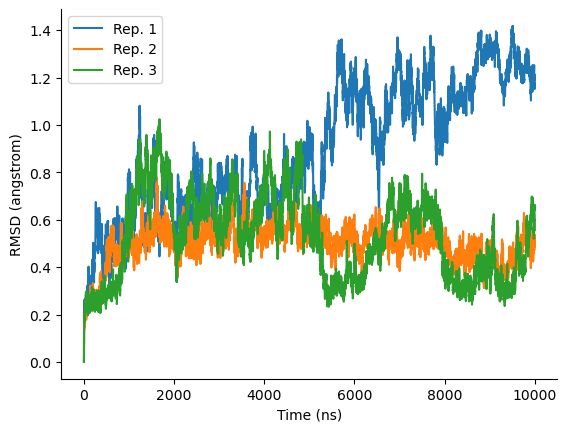

In [19]:
for rep in [1, 2, 3]:
    traj = trajectories[rep]
    # compute rmsd
    rmsd = md.rmsd(traj, traj, 0)

    plt.plot(rmsd, label=f"Rep. {rep}")

plt.legend()
plt.xlabel("Time (ns)")
plt.ylabel("RMSD (angstrom)")
sns.despine()
plt.show()

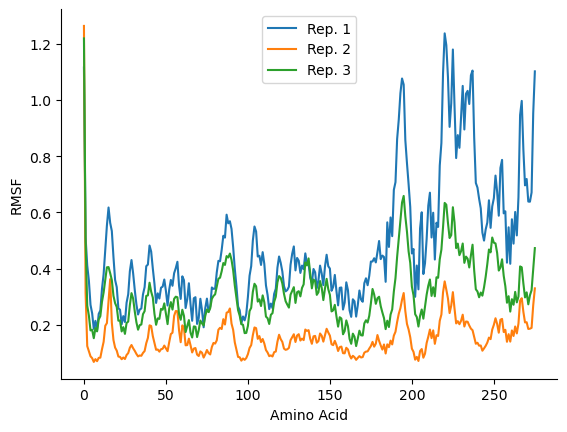

In [21]:
for rep in [1, 2, 3]:
    traj = trajectories[rep]
    # compute rmsf
    atom_indices = traj.top.select("name CA")
    rmsf = md.rmsf(traj, traj, 0, atom_indices=atom_indices)

    plt.plot(rmsf, label=f"Rep. {rep}")

plt.legend()
plt.xlabel("Amino Acid")
plt.ylabel("RMSF")
sns.despine()
plt.show()

In [16]:
display_trajectory(trajectories[1][::50])

NGLWidget(max_frame=200)

In [18]:
def slice_trajectory_tensor(xyz, start, end, every=1):
    return xyz[start:end:every, :, :]


slice_trajectory_tensor(traj.xyz, 0, 100).shape

(100, 7372, 3)

In [10]:
x = md.principal_moments(traj)

In [13]:
x

array([[0.79551003, 1.46355722, 3.15107153],
       [0.8266268 , 1.49838982, 3.22887229],
       [0.8254223 , 1.50744889, 3.24269781],
       ...,
       [0.87109421, 1.47139482, 3.35239578],
       [0.86484287, 1.47998935, 3.39409469],
       [0.86568924, 1.46860677, 3.36906871]])

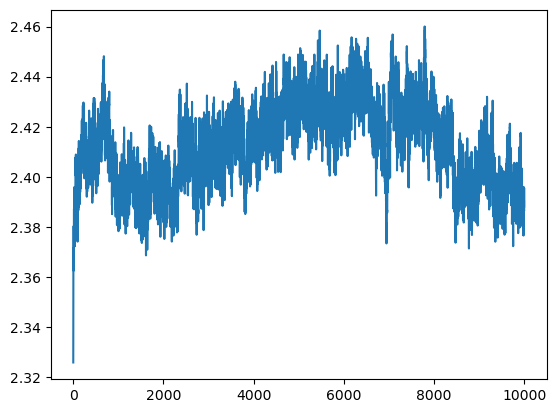

In [7]:
import numpy as np

rg = md.compute_rg(traj)
plt.plot(np.arange(len(rg)), rg)
plt.show()

In [11]:
display_trajectory(traj[::100])

NGLWidget(max_frame=100)

In [34]:
distances.shape

(10001, 484, 484)

<Axes: >

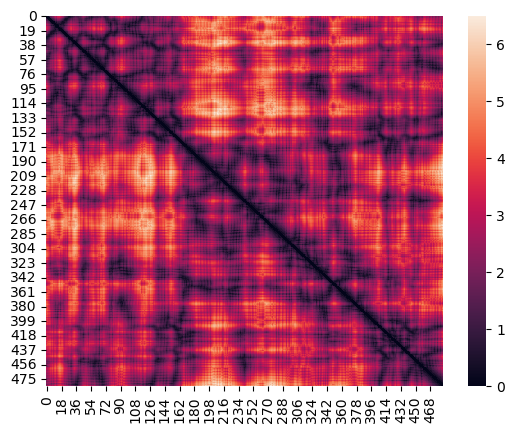

In [19]:
sns.heatmap(sqfm[0])

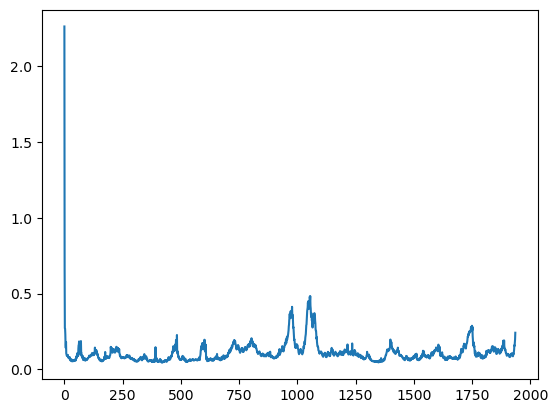

In [8]:
rmsf = md.rmsf(traj, traj, 0, atom_indices=traj.top.select("backbone"))
plt.plot(np.arange(len(rmsf)), rmsf)
plt.show()

In [9]:
d = display_trajectory(
    traj, coloring="bfactor", bfactor=rmsf, normalize=True, RMAX=0.25
)
d

NGLWidget(max_frame=10000)

In [17]:
rmsd = md.rmsd(traj, traj, 0, atom_indices=traj.top.select("backbone"))

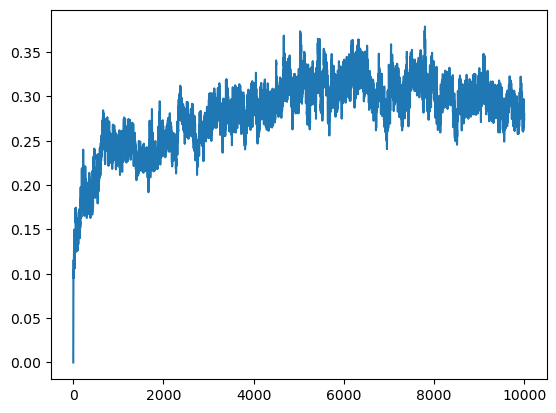

In [18]:
plt.plot(np.arange(len(rmsd)), rmsd)
plt.show()

In [15]:
pm = md.principal_moments(traj)
gt = md.compute_gyration_tensor(traj)

In [16]:
pm.shape, gt.shape

((10001, 3), (10001, 3, 3))

In [10]:
import nglview as nv

# Create the viewer

view = nv.show_mdtraj(traj)

# Optional: Customize the view
view.clear()
view.add_cartoon("protein", color="chainid")  # show cartoon representation
view.add_ball_and_stick("ligand")  # show ligands in ball and stick
view.center()  # center the view

# Display the viewer
view

NGLWidget(max_frame=10000)